In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [3]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


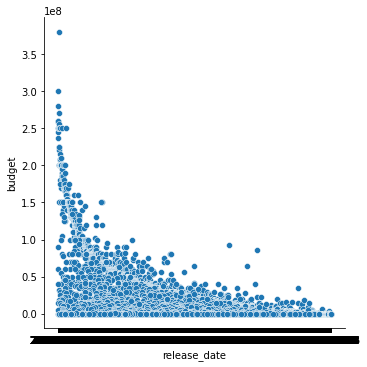

In [4]:
budget_evolution = sns.relplot(x="release_date", y="budget", data=tmdb)
plt.show()

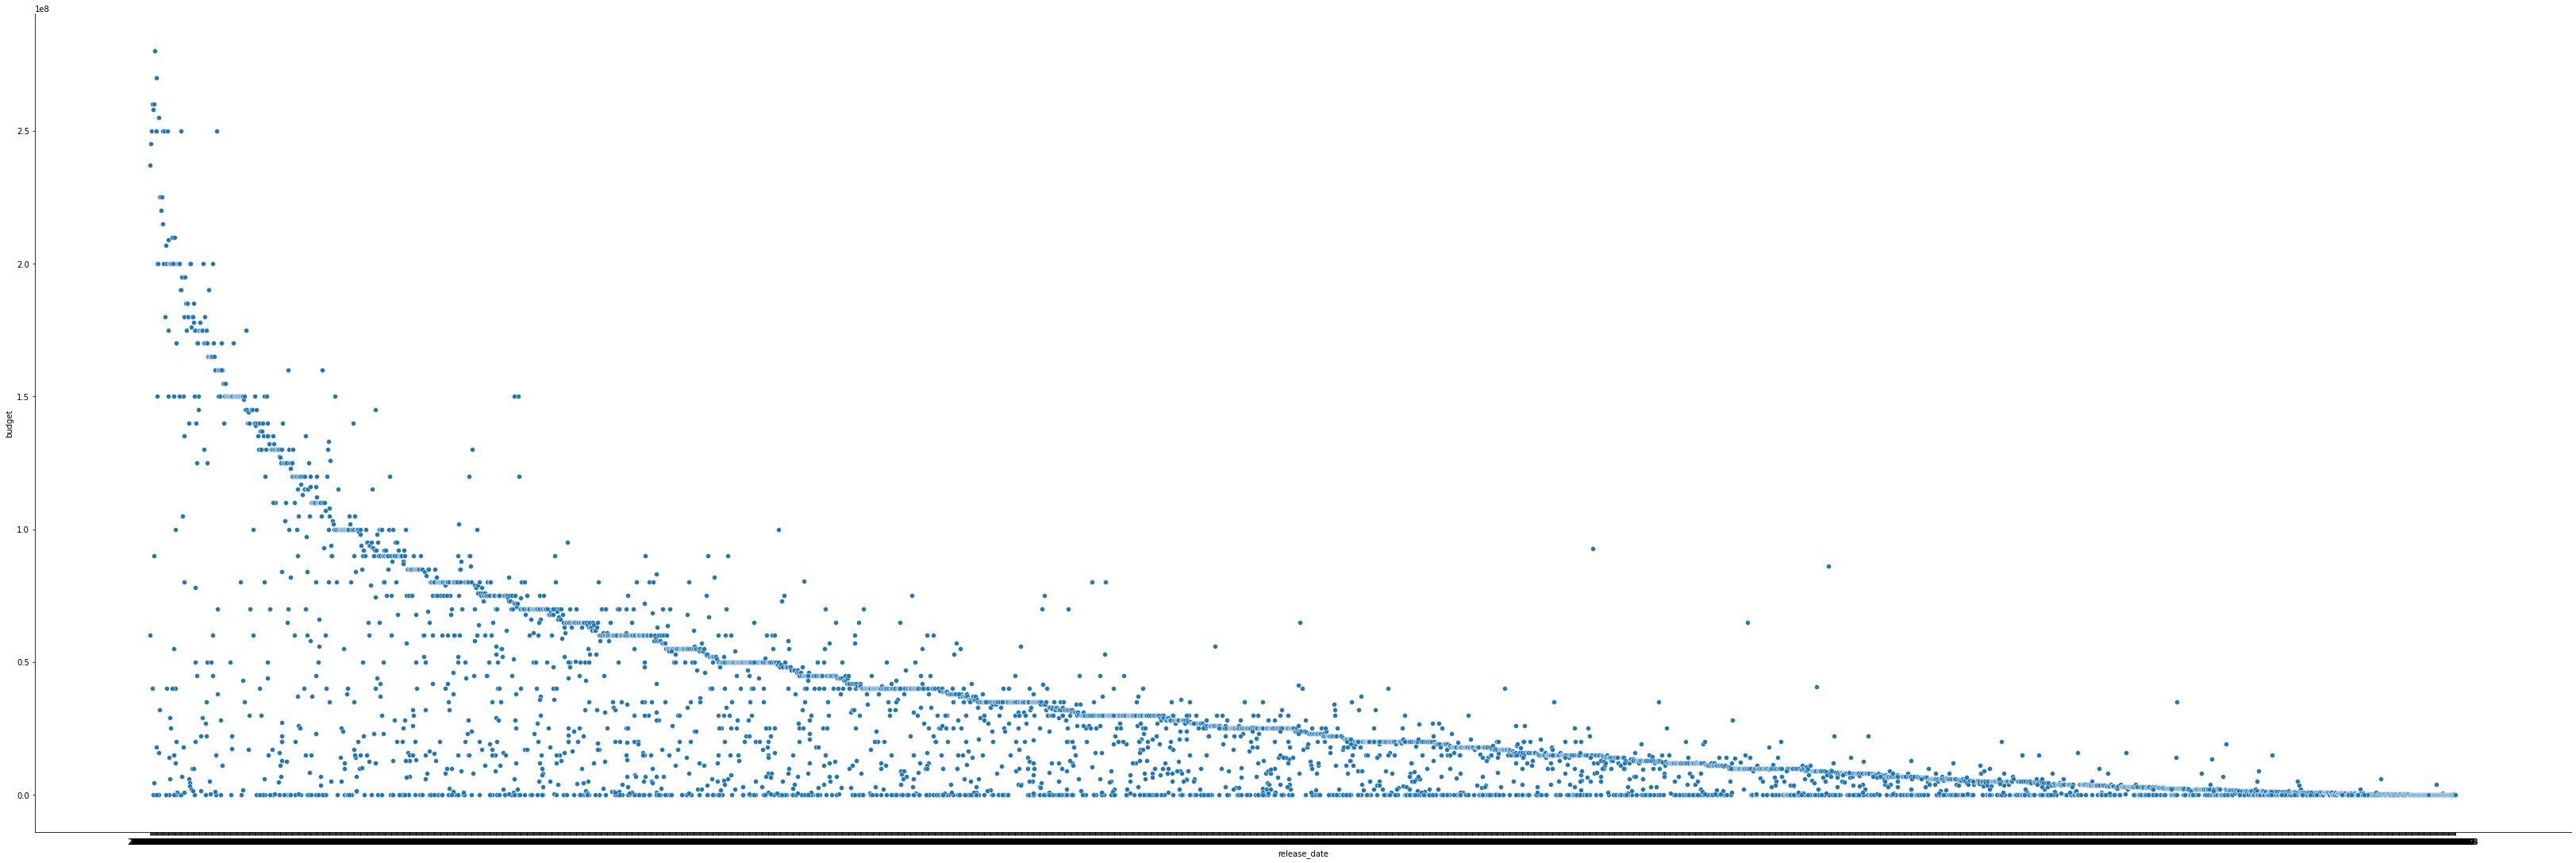

In [5]:
# Suppression des valeurs aberrantes et élargissement du graphique 
tmdb0 = tmdb[ tmdb["budget"]<3.000000e+08 ]
budget_evolution = sns.relplot(x="release_date", y="budget", data=tmdb0, aspect=3, height=15)


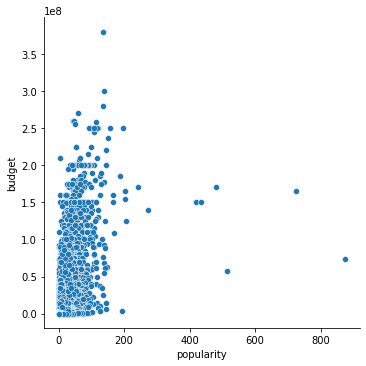

In [6]:
budget_popularity = sns.relplot(x="popularity", y="budget", data=tmdb)

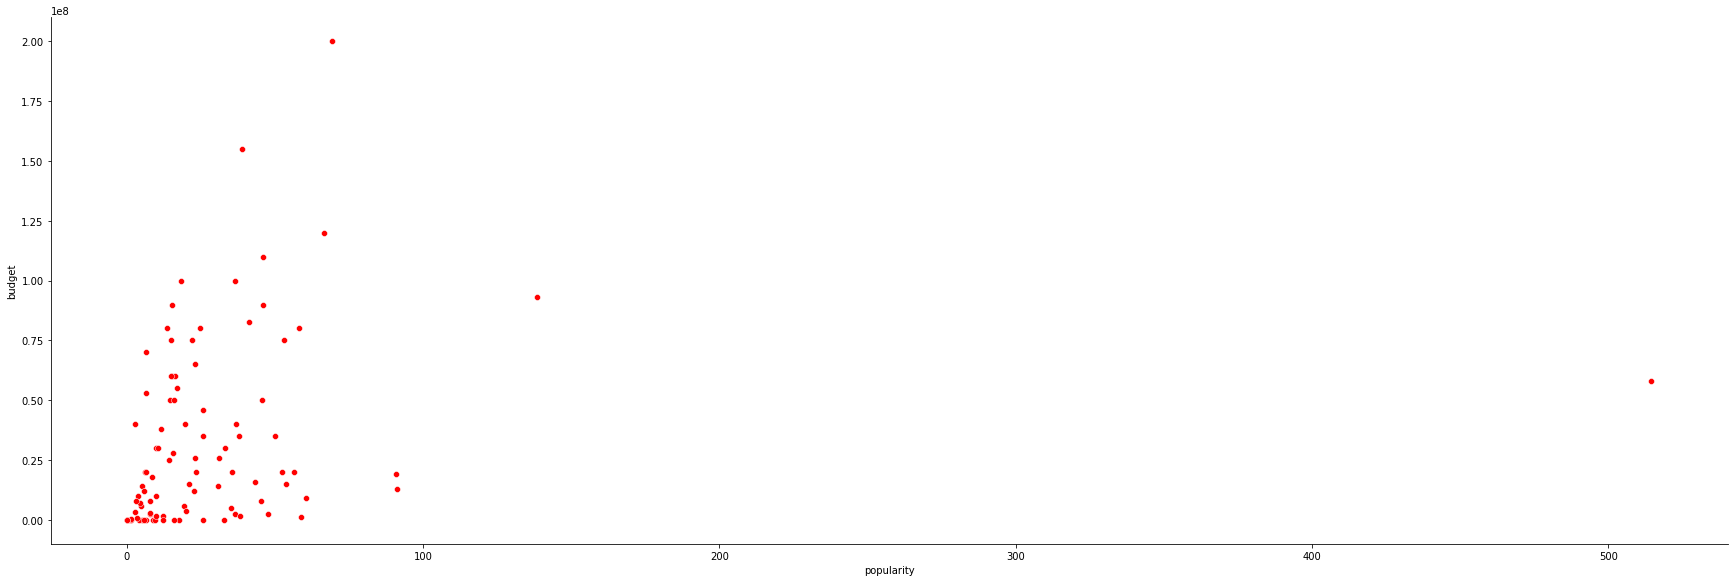

In [7]:
tmdb_sample = pd.DataFrame(tmdb).sample(n=100)
budget_popularity_sample = sns.relplot(x="popularity", y="budget", data=tmdb_sample, aspect=3, color="red", height=8)

In [8]:
# Observation : même en ne prenant qu'un sample de 100 lignes, la corrélation entre budget et popularité n'est pas très pertinente

In [9]:
# Tentons maintenant une représentation par catégorie via la colonne genre
tmdb['genres'].describe()

count                              4803
unique                             1175
top       [{"id": 18, "name": "Drama"}]
freq                                370
Name: genres, dtype: object

In [10]:
tmdb['genres'].count()

4803

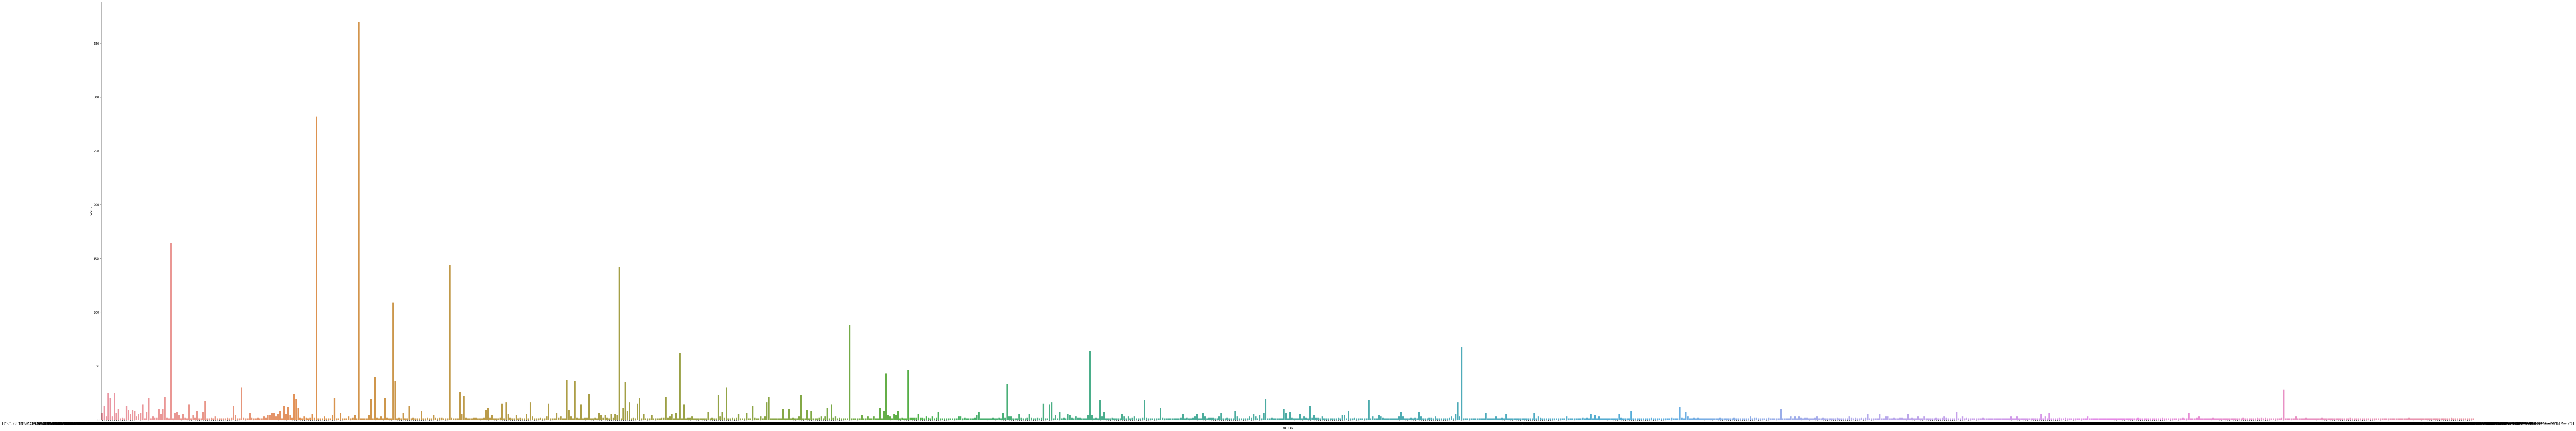

In [11]:
sns.catplot(x="genres", data=tmdb, kind="count", aspect=6, height=20)
# Beaucoup trop grand et illisible

In [12]:
# Là on ne prend que les 5 genres les plus présent dans le dataset
genre_count = tmdb['genres'].value_counts()
genre_count = genre_count[:5,]
genre_count

[{"id": 18, "name": "Drama"}]                                       370
[{"id": 35, "name": "Comedy"}]                                      282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]     164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]    144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]         142
Name: genres, dtype: int64

In [32]:
tmdb['genres'].iloc[[0]]

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

<AxesSubplot:title={'center':'mon graph'}>

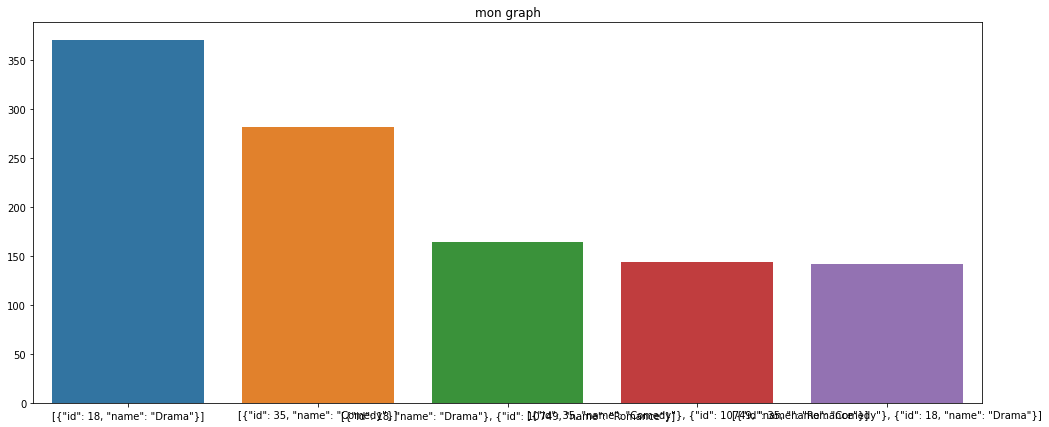

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,7))
plt.title('mon graph')
sns.barplot(x=genre_count.index, y=genre_count.values)

# Là on affiche que les 5 premiers genres (problème d'affichage pour les name des genres :/ )

<AxesSubplot:xlabel='count', ylabel='genres'>

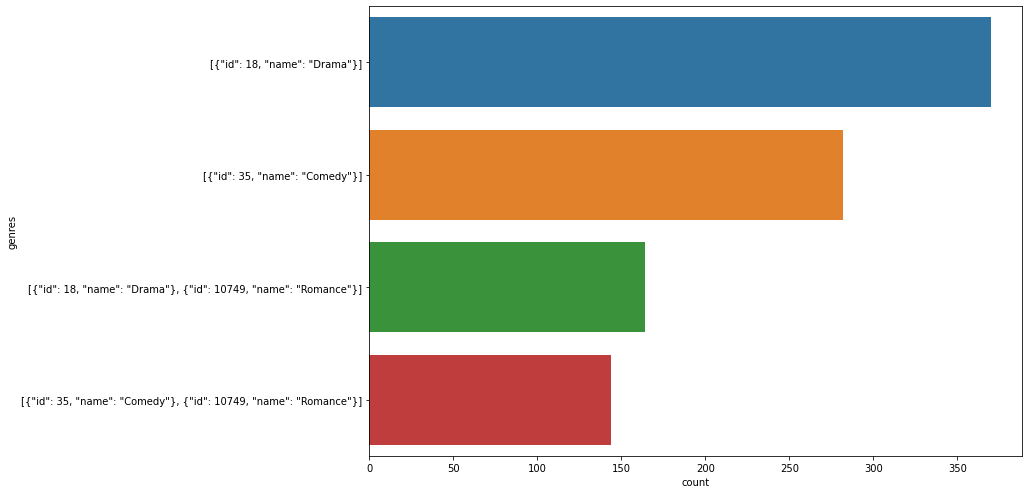

In [34]:
# Tests :
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.countplot(data=tmdb,y="genres",ax=ax,order=tmdb['genres'].value_counts().iloc[:4].index)


In [14]:
# Regardons un peu les colonnes 'vote_average' et 'vote_count'
tmdb['vote_average'].describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

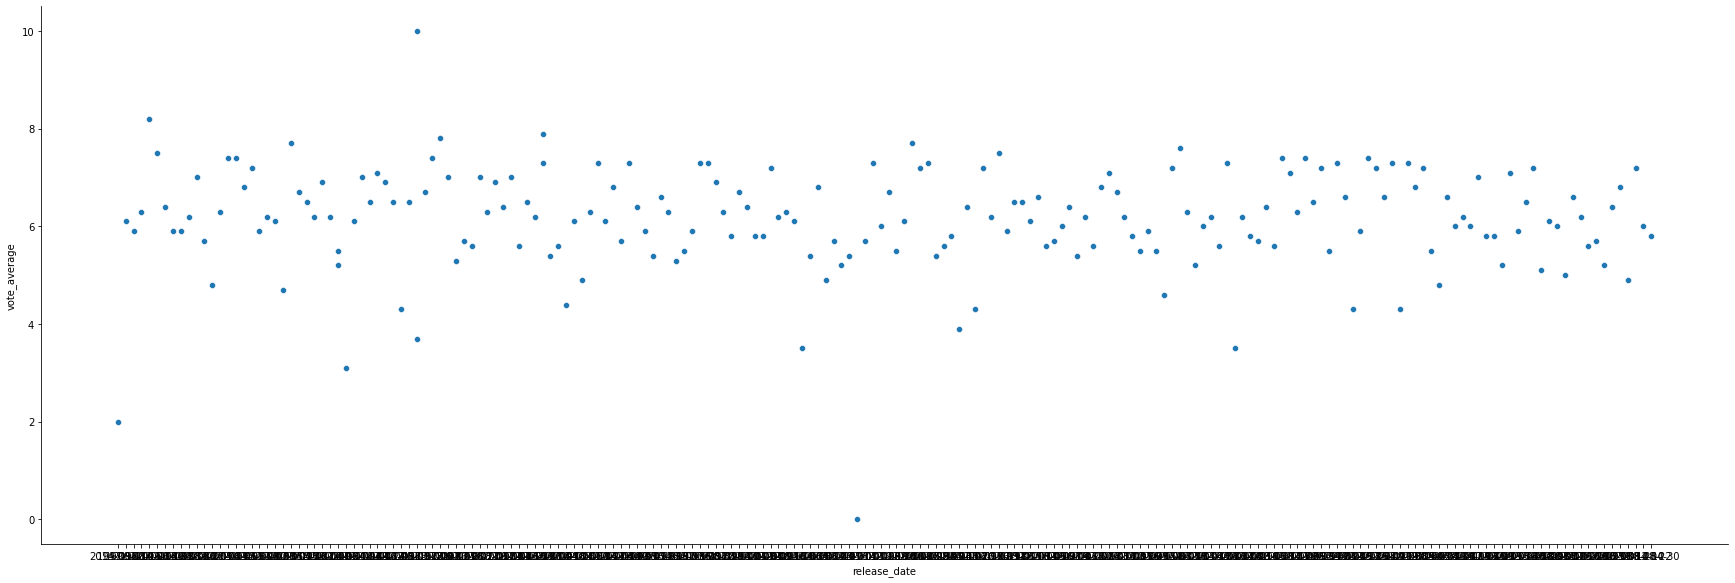

In [15]:
vote_evolution = sns.relplot(x="release_date", y="vote_average",height=8, aspect=3, data=tmdb.sample(200))

In [16]:
tmdb['vote_count'].describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64